# Explore here

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from lazypredict.Supervised import LazyRegressor
import lightgbm as lgb
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from skopt import BayesSearchCV

In [150]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",sep=';')
data.to_csv('/workspaces/machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv',index=False)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [151]:
data.shape


(41188, 21)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [153]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [154]:
data.duplicated().sum()

12

In [155]:
data.drop_duplicates().reset_index(drop = True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [156]:
data.isnull().mean()*100


age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

education. Nivel de educación (categórico)

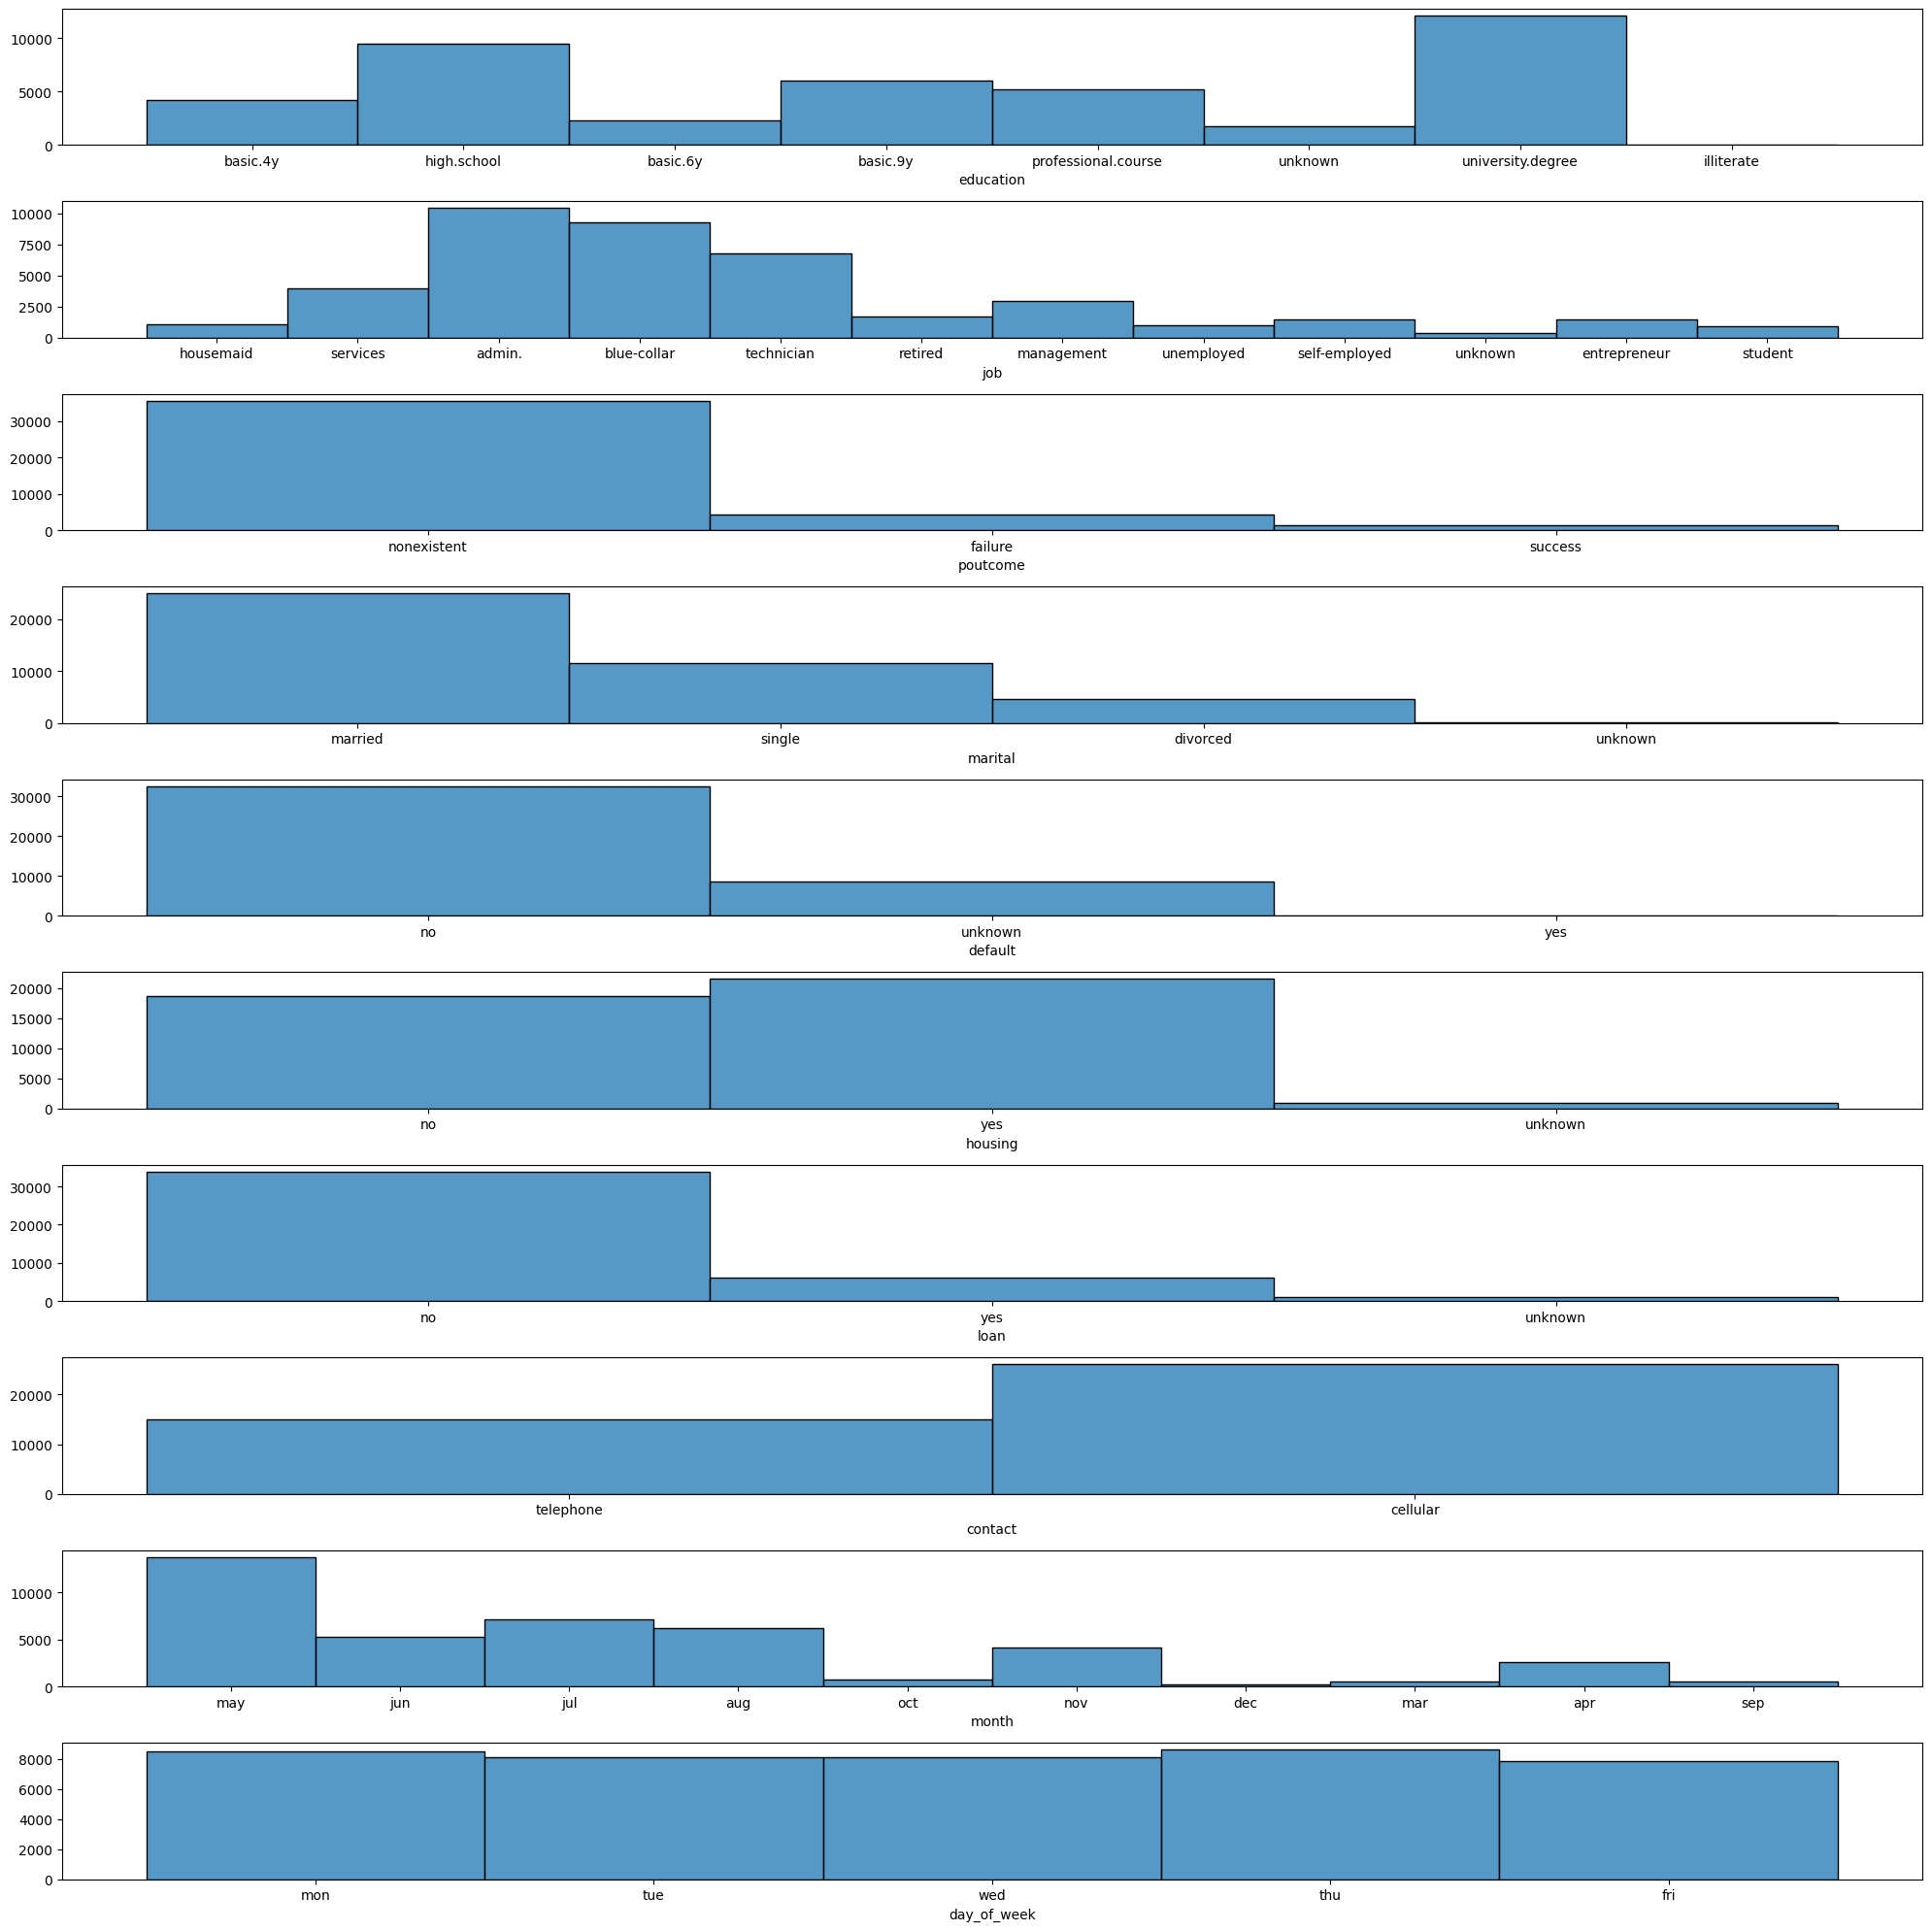

In [157]:
fig, axis = plt.subplots(10, figsize = (20, 20))
sns.histplot(ax = axis[0], data = data, x = 'education').set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = 'job').set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = 'poutcome').set(ylabel = None)
sns.histplot(ax = axis[3], data = data, x = 'marital').set(ylabel = None)
sns.histplot(ax = axis[4], data = data, x = 'default').set(ylabel = None)
sns.histplot(ax = axis[5], data = data, x = 'housing').set(ylabel = None)
sns.histplot(ax = axis[6], data = data, x = 'loan').set(ylabel = None)
sns.histplot(ax = axis[7], data = data, x = 'contact').set(ylabel = None)
sns.histplot(ax = axis[8], data = data, x = 'month').set(ylabel = None)
sns.histplot(ax = axis[9], data = data, x = 'day_of_week').set(ylabel = None)
plt.tight_layout()
plt.show()

podemos observar que las varuiables de default y poutcome tienen muchos datos que no existen o no se conocen asi que vamos a proceder a eliminar estas variables 

In [158]:
data.drop(['default','poutcome'],axis=1,inplace=True)

In [159]:
pd.unique(data['education'])

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [160]:
def education_level(education):
    if education == 'unknown':return 0
    elif education == 'illiterate' :return 1
    elif education == 'basic.4y' :return 2
    elif education == 'basic.6y' :return 3
    elif education == 'basic.9y' :return 4
    elif education == 'high.school' :return 5
    elif education == 'professional.course' :return 6
    elif education == 'university.degree' :return 7
    else:return None

data['education_level'] = data.education.apply(education_level)

In [161]:
def month_n(month):
    if month == 'ene': return 1
    elif month == 'feb': return 2
    elif month == 'mar': return 3
    elif month == 'apr': return 4
    elif month == 'may': return 5
    elif month == 'jun': return 6
    elif month == 'jul': return 7
    elif month == 'ago': return 8
    elif month == 'sep': return 9
    elif month == 'oct': return 10
    elif month == 'nov': return 11
    elif month == 'dic': return 12
    else: return None

data['month_n'] = data.month.apply(month_n)


In [162]:
colm_cat=['job','education','marital','housing','loan','contact','month','day_of_week','y']

In [163]:
data['n_job'] = pd.factorize(data['job'])[0]
data['n_marital'] = pd.factorize(data['marital'])[0]
data['n_housing'] = pd.factorize(data['housing'])[0]
data['n_loan'] = pd.factorize(data['loan'])[0]
data['n_contact'] = pd.factorize(data['contact'])[0]
data['n_day_of_week'] = pd.factorize(data['day_of_week'])[0]
data['n_y'] = pd.factorize(data['y'])[0]



In [164]:
pd.unique(data['n_day_of_week'])

array([0, 1, 2, 3, 4])

In [165]:
pd.unique(data['day_of_week'])

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [166]:
df_new = data.drop(colm_cat,axis=1)

In [167]:
df_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_level,month_n,n_job,n_marital,n_housing,n_loan,n_contact,n_day_of_week,n_y
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,2,5.00,0,0,0,0,0,0,0
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,5,5.00,1,0,0,0,0,0,0
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,5,5.00,1,0,1,0,0,0,0
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,3,5.00,2,0,0,0,0,0,0
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,5,5.00,1,0,0,1,0,0,0


In [168]:
df_new.apply(lambda x: x.skew())

age                0.78
duration           3.26
campaign           4.76
pdays             -4.92
previous           3.83
emp.var.rate      -0.72
cons.price.idx    -0.23
cons.conf.idx      0.30
euribor3m         -0.71
nr.employed       -1.04
education_level   -0.79
month_n            1.20
n_job              1.27
n_marital          1.04
n_housing          0.17
n_loan             2.23
n_contact         -0.56
n_day_of_week      0.00
n_y                2.45
dtype: float64

In [169]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_level,month_n,n_job,n_marital,n_housing,n_loan,n_contact,n_day_of_week,n_y
age,1.000,-0.001,0.005,-0.034,0.024,-0.000,0.001,0.129,0.011,-0.018,-0.182,0.058,0.030,-0.115,-0.002,-0.006,-0.007,-0.018,0.030
duration,-0.001,1.000,-0.072,-0.048,0.021,-0.028,0.005,-0.008,-0.033,-0.045,-0.016,-0.013,0.010,0.001,-0.009,-0.003,0.027,0.011,0.405
campaign,0.005,-0.072,1.000,0.053,-0.079,0.151,0.128,-0.014,0.135,0.144,-0.002,-0.038,-0.017,0.002,-0.010,0.004,-0.077,0.015,-0.066
pdays,-0.034,-0.048,0.053,1.000,-0.588,0.271,0.079,-0.091,0.297,0.373,-0.022,-0.076,-0.052,-0.018,-0.009,0.001,-0.118,0.007,-0.325
previous,0.024,0.021,-0.079,-0.588,1.000,-0.420,-0.203,-0.051,-0.454,-0.501,0.017,0.078,0.051,0.030,0.021,0.001,0.213,0.004,0.230
emp.var.rate,-0.000,-0.028,0.151,0.271,-0.420,1.000,0.775,0.196,0.972,0.907,-0.039,0.035,-0.083,-0.049,-0.053,0.003,-0.394,-0.004,-0.298
cons.price.idx,0.001,0.005,0.128,0.079,-0.203,0.775,1.000,0.059,0.688,0.522,-0.097,-0.087,-0.046,-0.025,-0.066,0.006,-0.591,-0.005,-0.136
cons.conf.idx,0.129,-0.008,-0.014,-0.091,-0.051,0.196,0.059,1.000,0.278,0.101,0.038,0.141,0.023,-0.051,-0.028,-0.006,-0.252,-0.000,0.055
euribor3m,0.011,-0.033,0.135,0.297,-0.454,0.972,0.688,0.278,1.000,0.945,-0.030,0.156,-0.072,-0.055,-0.053,0.002,-0.400,-0.006,-0.308
nr.employed,-0.018,-0.045,0.144,0.373,-0.501,0.907,0.522,0.101,0.945,1.000,-0.021,0.116,-0.085,-0.050,-0.042,0.002,-0.269,-0.001,-0.355


In [170]:
corr.n_y

age                0.03
duration           0.41
campaign          -0.07
pdays             -0.32
previous           0.23
emp.var.rate      -0.30
cons.price.idx    -0.14
cons.conf.idx      0.05
euribor3m         -0.31
nr.employed       -0.35
education_level    0.03
month_n            0.03
n_job              0.05
n_marital          0.03
n_housing          0.01
n_loan            -0.01
n_contact          0.14
n_day_of_week      0.01
n_y                1.00
Name: n_y, dtype: float64

In [171]:
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=df_new.columns)
vif

age                   1.36
duration              2.39
campaign              2.56
pdays                 7.45
previous             13.21
emp.var.rate      31092.49
cons.price.idx     1110.97
cons.conf.idx       290.95
euribor3m         81371.57
nr.employed       14343.57
education_level       1.78
month_n             234.39
n_job                 1.13
n_marital             1.12
n_housing             1.50
n_loan                1.42
n_contact           250.63
n_day_of_week         1.28
n_y                   5.78
dtype: float64

In [172]:
corr = df_new.corr()
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=df_new.columns)
vif

age                   1.36
duration              2.39
campaign              2.56
pdays                 7.45
previous             13.21
emp.var.rate      31092.49
cons.price.idx     1110.97
cons.conf.idx       290.95
euribor3m         81371.57
nr.employed       14343.57
education_level       1.78
month_n             234.39
n_job                 1.13
n_marital             1.12
n_housing             1.50
n_loan                1.42
n_contact           250.63
n_day_of_week         1.28
n_y                   5.78
dtype: float64

In [173]:
X = df_new.drop(['n_y'], axis=1)
y = df_new['n_y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
model = xgb.XGBRegressor(objective='reg:squarederror')

model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: nr.employed, Importance: 0.7187086939811707
Feature: duration, Importance: 0.04411664605140686
Feature: cons.conf.idx, Importance: 0.030585074797272682
Feature: pdays, Importance: 0.026776524260640144
Feature: cons.price.idx, Importance: 0.01934533566236496
Feature: n_contact, Importance: 0.018503936007618904
Feature: euribor3m, Importance: 0.01641911081969738
Feature: n_day_of_week, Importance: 0.0135470200330019
Feature: emp.var.rate, Importance: 0.013455361127853394
Feature: n_marital, Importance: 0.012320134788751602
Feature: campaign, Importance: 0.01231283601373434
Feature: education_level, Importance: 0.012122008018195629
Feature: month_n, Importance: 0.012110604904592037
Feature: n_job, Importance: 0.011929023079574108
Feature: age, Importance: 0.009882320649921894
Feature: previous, Importance: 0.009732834063470364
Feature: n_loan, Importance: 0.009199243038892746
Feature: n_housing, Importance: 0.00893312320113182


In [175]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vals_low_corr = corr[corr.n_y.abs()<=corr_cut].index
  return [var for var in ls_vals_low_corr if d_imp[var]<=imp_cut]

In [176]:
vals_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.03, corr_cut=0.15)
vals_to_drop

['age',
 'campaign',
 'cons.price.idx',
 'education_level',
 'month_n',
 'n_job',
 'n_marital',
 'n_housing',
 'n_loan',
 'n_contact',
 'n_day_of_week']

In [177]:
df_new.drop(vals_to_drop, axis=1, inplace=True)

In [178]:
X = df_new.drop(['n_y'], axis=1)
y = df_new['n_y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [180]:
scaler = MinMaxScaler().fit(X_train_num)

In [181]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [182]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [183]:
X_train_sc.head()

,duration,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
0,0.02,1.00,0.00,1.00,0.34,0.98,1.00
1,0.02,1.00,0.00,0.33,0.19,0.14,0.51
2,0.00,1.00,0.14,0.33,0.19,0.16,0.51
3,0.02,1.00,0.00,1.00,0.34,0.98,1.00
4,0.07,1.00,0.00,0.94,0.60,0.96,0.86


In [184]:
X_train_sc["y_n"] = list(y_train)
X_test_sc["y_n"] = list(y_test)

In [185]:
X_train = X_train_sc.drop(["y_n"], axis = 1)
y_train = X_train_sc["y_n"]
X_test = X_test_sc.drop(["y_n"], axis = 1)
y_test = X_test_sc["y_n"]

In [186]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.9085943190094683

In [189]:


hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, param_distributions=hyperparams, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='accuracy', verbose=1,return_train_score=True)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: U

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [190]:
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntuación (acurracy) en el conjunto de prueba:")
print(random_search.best_score_)


Mejores hiperparámetros encontrados:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Mejor puntuación (acurracy) en el conjunto de prueba:
0.908649468892261


In [194]:
model = LogisticRegression()
hyperparams = {
    "C": [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9],
    "penalty": ['l2'],
    "solver": ['liblinear']
}
opt = BayesSearchCV(
    model,
    hyperparams,
    n_iter=50,  
    cv=5,       
    n_jobs=-1,
    random_state=42,
    scoring='accuracy',  
    verbose=2
)
opt.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................C=0.9, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.9, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.9, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.9, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.9, penalty=l2, solver=liblinear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................C=1.7, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.7, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.7, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.7, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.7, penalty=l2, solver=liblinear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1, random_state=42,
              scoring='accuracy',
              search_spaces={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7,
                                   1.9],
                             'penalty': ['l2'], 'solver': ['liblinear']},
              verbose=2)

In [195]:
# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación  en el conjunto de prueba:")
print(opt.best_score_)

Mejores hiperparámetros encontrados:
OrderedDict([('C', 1.1), ('penalty', 'l2'), ('solver', 'liblinear')])
Mejor puntuación  en el conjunto de prueba:
0.9087405159332322


In [196]:
modelo = opt.best_estimator_

In [197]:
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [198]:
print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))

0.9084729303228939
0.9085280728376328


In [199]:
X_train_sc.head()


,duration,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.02,1.00,0.00,1.00,0.34,0.98,1.00,0
1,0.02,1.00,0.00,0.33,0.19,0.14,0.51,0
2,0.00,1.00,0.14,0.33,0.19,0.16,0.51,0
3,0.02,1.00,0.00,1.00,0.34,0.98,1.00,0
4,0.07,1.00,0.00,0.94,0.60,0.96,0.86,0


In [200]:
def custom_transform(X):
    binary_cols = X[(X==0)|(X==1)].dropna(axis=1).columns
    X_num = X.drop(binary_cols, axis=1)
    X_num_sc = scaler.transform(X_num)
    X_sc = pd.concat([pd.DataFrame(X_num_sc), X[binary_cols].reset_index(drop=True)], axis=1, ignore_index=True)
    return X_sc
steps = [
    ('custom_transform', FunctionTransformer(func=custom_transform)),  # Paso con función personalizada
    ('modelo', modelo)  
]


pipeline = Pipeline(steps)

In [201]:
joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [202]:
loaded_pipeline = joblib.load('model_pipeline.pkl')